# Visual Analysis of Top 7 Cryptocurrencies Since 2015

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Import data
crypto_df = pd.read_csv('../Resources/CryptoCurrency.csv')

# Create List
ticker_list = crypto_df['Ticker'].unique().tolist()
values_list = ['Open in USD', 'High in USD', 'Low in USD', 'Close in USD', 'Adj Close in USD', 'Volume in Billions']

## Total Volumes

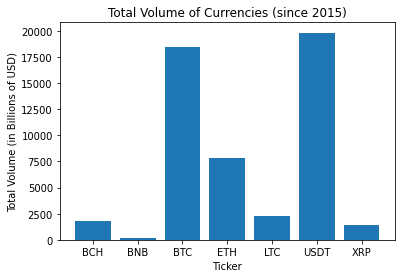

In [2]:
# Create empty list
volume_list = []

# Loop through ticker symbols
for ticker in ticker_list:
    
    # Find sum of daily volumes
    df = crypto_df.loc[crypto_df['Ticker'] == ticker]
    volume = sum(df['Volume in Billions'])
    
    # Add total volumes to list
    volume_list.append(volume)

# Plot bar chart
plt.bar(ticker_list, volume_list)
plt.title('Total Volume of Currencies (since 2015)')
plt.xlabel('Ticker')
plt.ylabel('Total Volume (in Billions of USD)')
plt.show()

## Comparing Curriencies Over Time

### Create Line Graphs Based on User Input

Ticker List
['BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'USDT', 'XRP']
-----------------------------------
Select two currencies to compare based on above list:
Enter first ticker symbol:BTC
Enter second ticker symbol:ETH
-------------------------------------
Value List
['Open in USD', 'High in USD', 'Low in USD', 'Close in USD', 'Adj Close in USD', 'Volume in Billions']
-------------------------------------
Select a value to compare based on above list:Low in USD


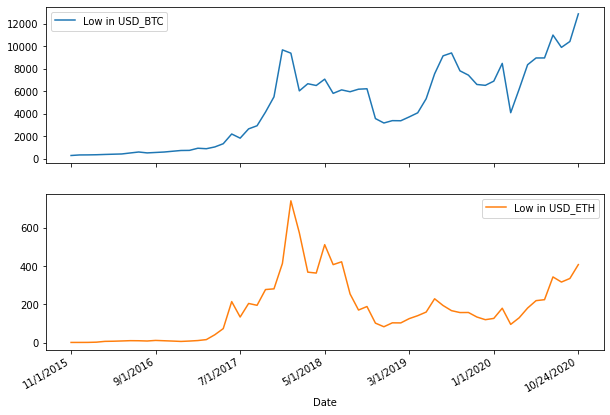

In [3]:
print('Ticker List')
print(ticker_list)
print('-----------------------------------')
print('Select two currencies to compare based on above list:')

# Collect inputs
ticker1 = input('Enter first ticker symbol:').upper()
ticker2 = input('Enter second ticker symbol:').upper()
print('-------------------------------------')

print('Value List')
print(values_list)
print('-------------------------------------')
column = input('Select a value to compare based on above list:')

# Seperate user input into dataframes
ticker1_df = crypto_df.loc[crypto_df['Ticker'] == ticker1]
ticker2_df = crypto_df.loc[crypto_df['Ticker'] == ticker2]

# Merge new dataframes to make subplots
merged = pd.merge(ticker1_df, ticker2_df, how='inner', on='Date')

# Narrow data down to two columns and rename
column_df = merged[['Date',f'{column}_x',f'{column}_y']].set_index('Date')
column_df = column_df.rename(columns = {f'{column}_x' : f'{column}_{ticker1}',
                                        f'{column}_y' : f'{column}_{ticker2}'})

# Create graphs
column_df.plot.line(subplots=True, figsize=(10,7))
plt.show()

## Correlation Graphs

### Open vs. Close

['BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'USDT', 'XRP']
------------------------
Please select from the above list.
Which Ticker would you like to look at?BNB
-------------------------
The r-value is 0.907210851335872


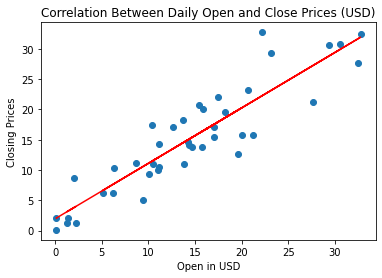

In [4]:
# Collect input
print(ticker_list)
print('------------------------')
print('Please select from the above list.')
ticker3 = input('Which Ticker would you like to look at?').upper()

# Create dataframe based on input
scatter_df = crypto_df.loc[crypto_df['Ticker'] == ticker3]

# Determine variables
x = scatter_df['Open in USD']
y = scatter_df['Close in USD']

# Get regression values and print r-values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
print('-------------------------')
print(f'The r-value is {rvalue}')

# Create Graph
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

plt.title('Correlation Between Daily Open and Close Prices (USD)')
plt.ylabel('Closing Prices')
plt.xlabel('Open in USD')
plt.show()

### High vs. Close

['BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'USDT', 'XRP']
------------------------
Please select from the above list.
Which Ticker would you like to look at?BCH
-------------------------
The r-value is 0.969608057305118


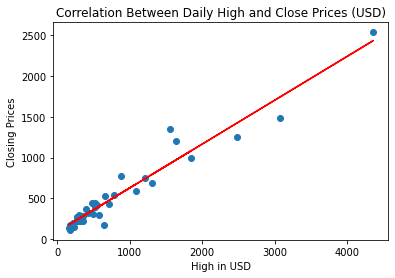

In [6]:
# Repeat previous cell with daily highs
print(ticker_list)
print('------------------------')
print('Please select from the above list.')
ticker3 = input('Which Ticker would you like to look at?').upper()

scatter_df = crypto_df.loc[crypto_df['Ticker'] == ticker3]

x = scatter_df['High in USD']
y = scatter_df['Close in USD']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
print('-------------------------')
print(f'The r-value is {rvalue}')

plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

plt.title('Correlation Between Daily High and Close Prices (USD)')
plt.ylabel('Closing Prices')
plt.xlabel('High in USD')
plt.show()




### Low vs. Close

['BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'USDT', 'XRP']
------------------------
Please select from the above list.
Which Ticker would you like to look at?USDT
-------------------------
The r-value is 0.13378859012736002


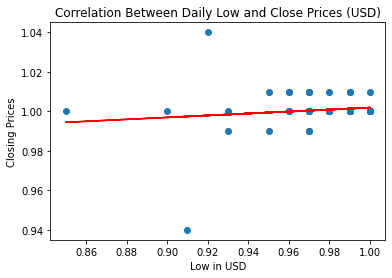

In [8]:
# Repeat with daily lows
print(ticker_list)
print('------------------------')
print('Please select from the above list.')
ticker3 = input('Which Ticker would you like to look at?').upper()

scatter_df = crypto_df.loc[crypto_df['Ticker'] == ticker3]

x = scatter_df['Low in USD']
y = scatter_df['Close in USD']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
print('-------------------------')
print(f'The r-value is {rvalue}')

plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

plt.title('Correlation Between Daily Low and Close Prices (USD)')
plt.ylabel('Closing Prices')
plt.xlabel('Low in USD')
plt.show()

